# **CVII - 2022**

The code is open source so it can be used as an starting point for your personal projects (Ref-ISBN: 9781098102333)

##### **Dataset**
The dataset can be found and freely downloaded from the below bucket:

* gs://cloud-ml-data/img/flower_photos/train_set.csv
* gs://cloud-ml-data/img/flower_photos/eval_set.csv

# **Always Run The Below Cell**

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
import matplotlib
import os
import random
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/AABC')

IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
BATCH_SIZE = 32

CLASS_NAMES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

all_flowers = tf.io.gfile.glob("flower_photos/*/*")

def read_reshape_img(filename, reshape_dims):
    img = tf.io.read_file(filename)
    # Convert the compressed string to a 3D uint8 tensor.
    img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image to the desired size.
    return tf.image.resize(img, reshape_dims)

def decode_csv(row):
    cols = ["path", "flower"]
    filename, label = tf.io.decode_csv(records=row, record_defaults=cols)
    img = read_reshape_img(filename, [IMG_HEIGHT, IMG_WIDTH])
    # numerizing the label (not one-hot encode)
    # So the label is sparse
    label = tf.argmax(tf.math.equal(CLASS_NAMES, label))
    return img, label

def show_single_image(filename):
    img = read_reshape_img(filename, [IMG_HEIGHT, IMG_WIDTH])
    print("Shape:", img.shape)
    plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imshow((img.numpy()));

def show_100_images(all_flowers):
  fig, axes = plt.subplots(10,10,figsize=(15,15))
  for i in range(10):
      for j in range(10):
          axes[i,j].set_xticks([])
          axes[i,j].set_yticks([])
          axes[i,j].spines['top'].set_visible(False)
          axes[i,j].spines['right'].set_visible(False)
          axes[i,j].spines['bottom'].set_visible(False)
          axes[i,j].spines['left'].set_visible(False)
          axes[i,j].imshow(read_reshape_img(all_flowers[random.randint(1, len(all_flowers))], [IMG_HEIGHT, IMG_WIDTH]))

def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(15,5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Epochs")
        # ax[idx].set_ylabel(metric, fontweight='bold', fontsize=20)
        ax[idx].plot(history.history['val_' + metric], ls='dashed');
        ax[idx].legend([metric, 'val_' + metric], fontsize=20)

def plot_predictions(filename):
  matplotlib.rcParams.update({'font.size': 14})
  f, ax = plt.subplots(3, 5, figsize=(25,15))
  dataset = (tf.data.TextLineDataset(filename).
      map(decode_csv))
  for idx, (img, label) in enumerate(dataset.take(15)):
    ax[idx//5, idx%5].imshow((img.numpy()));
    batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
    batch_pred = model.predict(batch_image)
    pred = batch_pred[0]
    label = CLASS_NAMES[label.numpy()]
    pred_label_index = tf.math.argmax(pred).numpy()
    pred_label = CLASS_NAMES[pred_label_index]
    prob = pred[pred_label_index]
    ax[idx//5, idx%5].set_title('{} -> {} ({:.2f})'.format(label, pred_label, prob))
    ax[idx//5, idx%5].axis('off')

train_dataset = tf.data.TextLineDataset('train_set.csv').map(decode_csv).batch(BATCH_SIZE)
eval_dataset = tf.data.TextLineDataset('eval_set.csv').map(decode_csv).batch(BATCH_SIZE)


Mounted at /content/drive


Shape: (224, 224, 3)


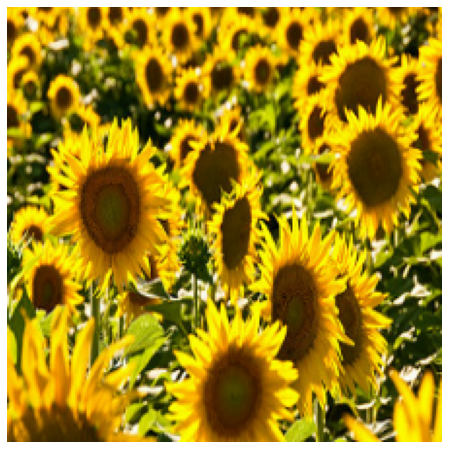

In [ ]:
show_single_image(all_flowers[random.randint(1,len(all_flowers))])

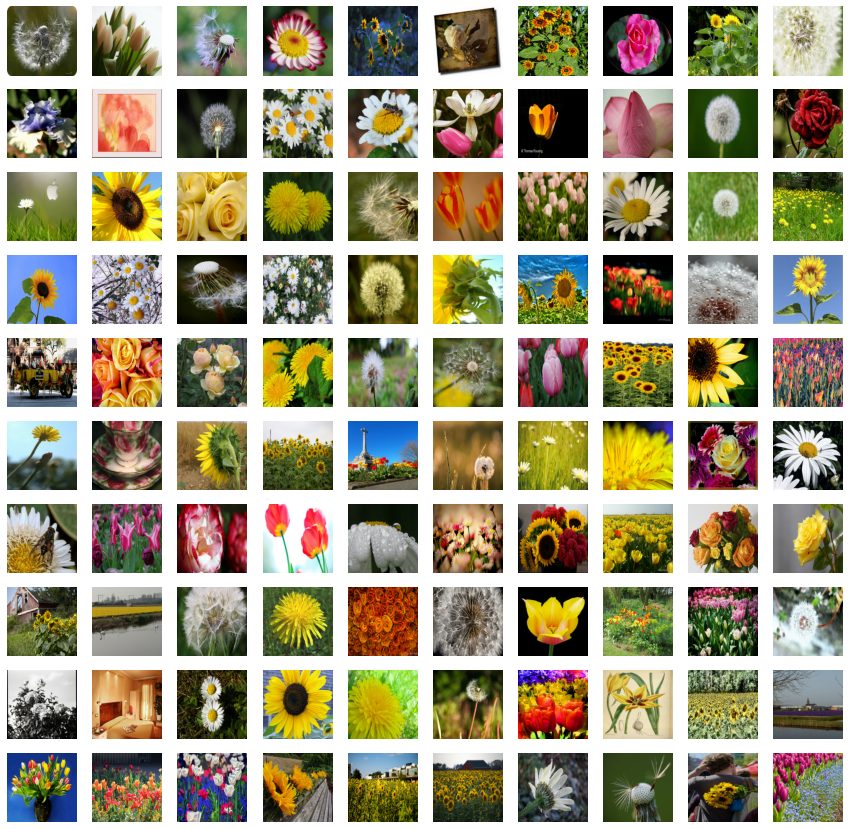

In [ ]:
show_100_images(all_flowers)

In [ ]:
from keras import layers
model = keras.Sequential([
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Dense(128, activation=tf.keras.activations.relu),
    Dense(len(CLASS_NAMES), activation='softmax')
])
model.compile(optimizer='adam', 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 150528)            0         
                                                                 
 dense_16 (Dense)            (None, 128)               19267712  
                                                                 
 dense_17 (Dense)            (None, 5)                 645       
                                                                 
Total params: 19,268,357
Trainable params: 19,268,357
Non-trainable params: 0
_________________________________________________________________


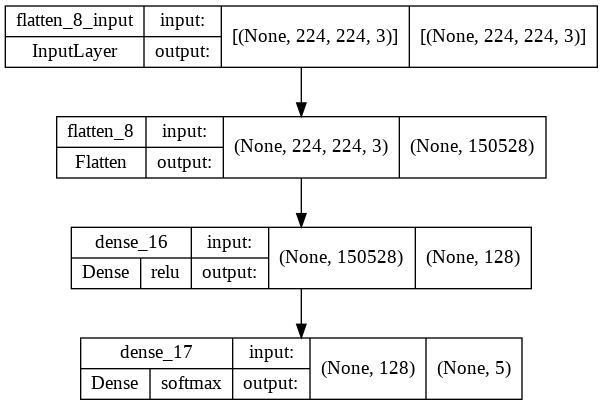

In [ ]:
import pydotplus
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [ ]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=10)

Epoch 1/10
104/104 [==============================] - 307s 3s/step - loss: 11.3733 - accuracy: 0.2855 - val_loss: 1.9969 - val_accuracy: 0.2595
Epoch 2/10
104/104 [==============================] - 226s 2s/step - loss: 1.7467 - accuracy: 0.3555 - val_loss: 1.4710 - val_accuracy: 0.3162
Epoch 3/10
104/104 [==============================] - 208s 2s/step - loss: 1.4481 - accuracy: 0.3485 - val_loss: 1.5155 - val_accuracy: 0.2973
Epoch 4/10
104/104 [==============================] - 203s 2s/step - loss: 1.4981 - accuracy: 0.3148 - val_loss: 1.5243 - val_accuracy: 0.2811
Epoch 5/10
104/104 [==============================] - 205s 2s/step - loss: 1.4909 - accuracy: 0.3239 - val_loss: 1.5824 - val_accuracy: 0.2459
Epoch 6/10
104/104 [==============================] - 214s 2s/step - loss: 1.5001 - accuracy: 0.3064 - val_loss: 1.6065 - val_accuracy: 0.2405
Epoch 7/10
104/104 [==============================] - 216s 2s/step - loss: 1.5480 - accuracy: 0.2530 - val_loss: 1.6093 - val_accuracy: 0.218

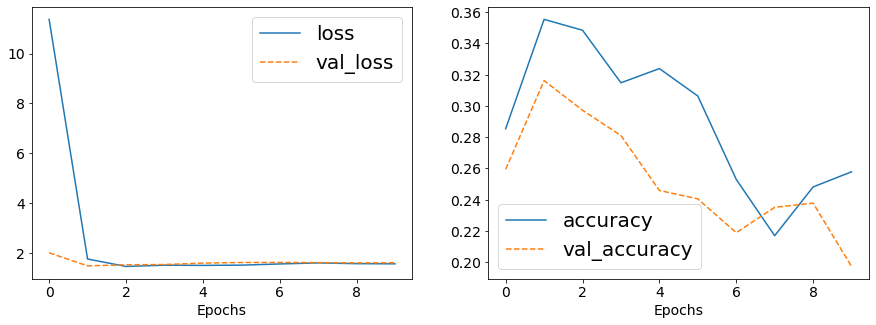

In [ ]:
training_plot(['loss', 'accuracy'], history)

In [ ]:
plot_predictions("train_set.csv")

Output hidden; open in https://colab.research.google.com to view.

# Reapeating with a lower learning rate = 0.0001

Epoch 1/10
104/104 [==============================] - 183s 2s/step - loss: 2.0341 - accuracy: 0.3594 - val_loss: 2.1423 - val_accuracy: 0.3027
Epoch 2/10
104/104 [==============================] - 180s 2s/step - loss: 1.5871 - accuracy: 0.4321 - val_loss: 2.5723 - val_accuracy: 0.3622
Epoch 3/10
104/104 [==============================] - 180s 2s/step - loss: 1.5131 - accuracy: 0.4721 - val_loss: 2.4119 - val_accuracy: 0.3946
Epoch 4/10
104/104 [==============================] - 179s 2s/step - loss: 1.4756 - accuracy: 0.4915 - val_loss: 2.0273 - val_accuracy: 0.4324
Epoch 5/10
104/104 [==============================] - 179s 2s/step - loss: 1.2969 - accuracy: 0.5273 - val_loss: 1.8215 - val_accuracy: 0.4216
Epoch 6/10
104/104 [==============================] - 180s 2s/step - loss: 1.2537 - accuracy: 0.5497 - val_loss: 2.0815 - val_accuracy: 0.4432
Epoch 7/10
104/104 [==============================] - 179s 2s/step - loss: 1.3246 - accuracy: 0.5448 - val_loss: 1.4301 - val_accuracy: 0.4784

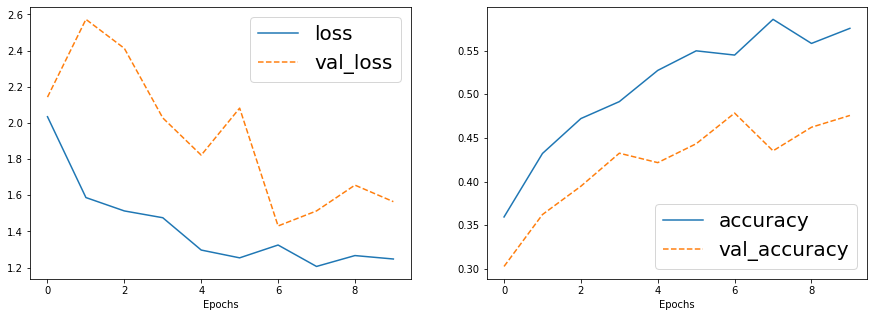

In [ ]:
# run again
model2 = keras.Sequential(layers=[
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    Dense(128, activation='relu'),
    Dense(len(CLASS_NAMES), activation='softmax')
])
model2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

history2 = model2.fit(train_dataset, validation_data=eval_dataset, epochs=10)

training_plot(['loss', 'accuracy'], history2)

# L2 regularization 
###### to limit overfitting to the maximum possible amount

Epoch 1/10
104/104 [==============================] - 195s 2s/step - loss: 15.3148 - accuracy: 0.3242 - val_loss: 4.0682 - val_accuracy: 0.3892
Epoch 2/10
104/104 [==============================] - 198s 2s/step - loss: 3.7422 - accuracy: 0.4148 - val_loss: 4.4216 - val_accuracy: 0.3270
Epoch 3/10
104/104 [==============================] - 201s 2s/step - loss: 3.8659 - accuracy: 0.4348 - val_loss: 2.8104 - val_accuracy: 0.4297
Epoch 4/10
104/104 [==============================] - 203s 2s/step - loss: 3.1218 - accuracy: 0.4576 - val_loss: 4.4838 - val_accuracy: 0.3730
Epoch 5/10
104/104 [==============================] - 203s 2s/step - loss: 3.2598 - accuracy: 0.4673 - val_loss: 2.8327 - val_accuracy: 0.4541
Epoch 6/10
104/104 [==============================] - 196s 2s/step - loss: 2.5866 - accuracy: 0.5170 - val_loss: 3.9189 - val_accuracy: 0.4135
Epoch 7/10
104/104 [==============================] - 200s 2s/step - loss: 1.9729 - accuracy: 0.5630 - val_loss: 3.9615 - val_accuracy: 0.386

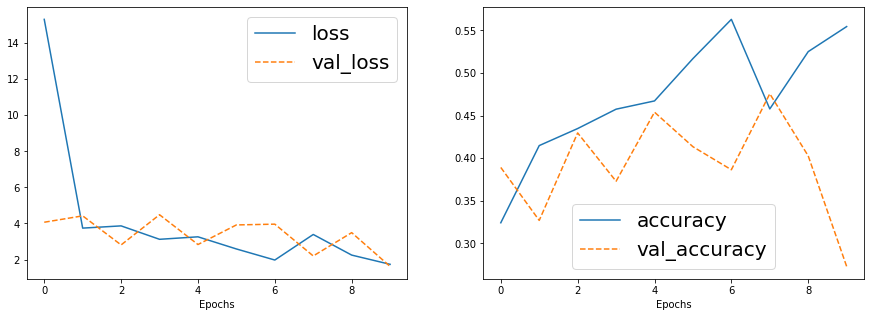

In [ ]:
# run again
regularizer = keras.regularizers.l1_l2(l1=0.0, l2=0.001) # penalty 0.001 for L2 regularization term

model3 = keras.Sequential(layers=[
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    
    Dense(128, 
          activation=keras.activations.relu , 
          kernel_regularizer=regularizer),

    Dense(len(CLASS_NAMES), 
          kernel_regularizer=regularizer , 
          activation='softmax')
])

model3.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

history3 = model3.fit(train_dataset, validation_data=eval_dataset, epochs=10)

training_plot(['loss', 'accuracy'], history3)

# Hyper Parameter Tuning With keras tuner

In [ ]:
!pip install --quiet keras-tuner

In [ ]:
import keras_tuner as kt

# parameterize to the values
def build_model(hp):
  lrate = hp.Float('lrate', min_value=1e-4, max_value=1e-1, sampling='log')
  l1 = 0
  l2 = hp.Choice('l2', values=[0.0, 1e-1, 1e-2, 1e-3, 1e-4])
  num_hidden = hp.Int('num_hidden', min_value=32, max_value=256, step=32)

  regularizer = tf.keras.regularizers.l1_l2(l1, l2)

  # NN with one hidden layers
  model = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
              tf.keras.layers.Dense(num_hidden,
                                    kernel_regularizer=regularizer, 
                                    activation=tf.keras.activations.relu),
              tf.keras.layers.Dense(len(CLASS_NAMES), 
                                    kernel_regularizer=regularizer,
                                    activation='softmax')
  ])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
  return model

#####################################
# Instantiate the tuner
# The Keras Tuner has four tuners available - RandomSearch, Hyperband, BayesianOptimization, and Sklearn
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective('val_accuracy', 'max'), 
    max_trials=10,
    num_initial_points=2, 
    overwrite=False) # True to start afresh.

# Start the search
tuner.search(
    train_dataset, validation_data=eval_dataset,
    epochs=5,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)]
)

topN = 1
for x in range(topN):
  print(tuner.get_best_hyperparameters(topN)[x].values)
  print(tuner.get_best_models(topN)[x].summary())

Trial 10 Complete [00h 01m 24s]
val_accuracy: 0.4513513445854187

Best val_accuracy So Far: 0.4513513445854187
Total elapsed time: 00h 30m 29s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


{'lrate': 0.0001, 'l2': 0.0, 'num_hidden': 256}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 256)               38535424  
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 38,536,709
Trainable params: 38,536,709
Non-trainable params: 0
_________________________________________________________________


None


#### Best results on the model with one hidden layer
```
Best val_accuracy So Far: 0.4513513445854187
Total elapsed time: 00h 30m 29s
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit
{'lrate': 0.0001, 'l2': 0.0, 'num_hidden': 256}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param    
=================================================================
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 256)               38535424  
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
=================================================================

Total params: 38,536,709
Trainable params: 38,536,709
Non-trainable params: 0
```

#### Lets Train with the best parameters 

Epoch 1/15
104/104 [==============================] - 516s 5s/step - loss: 2.9284 - accuracy: 0.3527 - val_loss: 1.4879 - val_accuracy: 0.3649
Epoch 2/15
104/104 [==============================] - 419s 4s/step - loss: 1.5335 - accuracy: 0.4312 - val_loss: 1.9998 - val_accuracy: 0.3595
Epoch 3/15
104/104 [==============================] - 354s 3s/step - loss: 1.4158 - accuracy: 0.4745 - val_loss: 2.0096 - val_accuracy: 0.3676
Epoch 4/15
104/104 [==============================] - 304s 3s/step - loss: 1.3188 - accuracy: 0.5106 - val_loss: 2.1359 - val_accuracy: 0.3919
Epoch 5/15
104/104 [==============================] - 251s 2s/step - loss: 1.2197 - accuracy: 0.5424 - val_loss: 2.2622 - val_accuracy: 0.3919
Epoch 6/15
104/104 [==============================] - 234s 2s/step - loss: 1.1908 - accuracy: 0.5642 - val_loss: 2.2642 - val_accuracy: 0.3973
Epoch 7/15
104/104 [==============================] - 204s 2s/step - loss: 1.2562 - accuracy: 0.5382 - val_loss: 1.9415 - val_accuracy: 0.4432

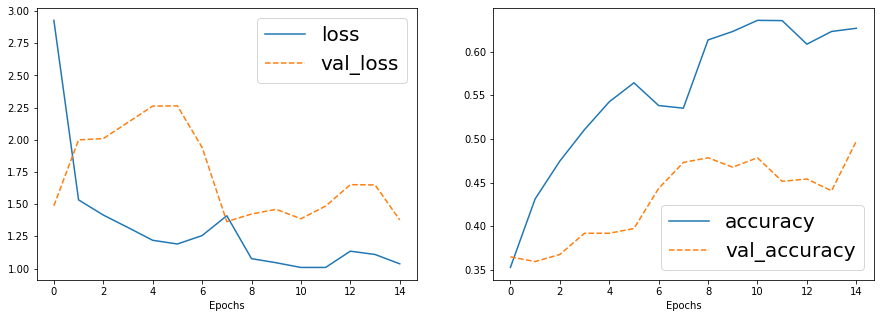

In [ ]:
regularizer = keras.regularizers.l1_l2(l1=0.0, l2=0.0) # penalty 0.001 for L2 regularization term
num_hidden= 256
lrate = 0.0001

model4 = keras.Sequential(layers=[
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    
    Dense(num_hidden, 
          activation=keras.activations.relu , 
          kernel_regularizer=regularizer),

    Dense(len(CLASS_NAMES), 
          kernel_regularizer=regularizer , 
          activation='softmax')
])

model4.compile(optimizer = keras.optimizers.Adam(learning_rate=lrate),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

history4 = model4.fit(train_dataset, 
                      validation_data=eval_dataset, 
                      epochs=15)

training_plot(['loss', 'accuracy'], history4)

#### Highest 

Epoch 1/20
104/104 [==============================] - 214s 2s/step - loss: 2.5193 - accuracy: 0.3536 - val_loss: 1.5408 - val_accuracy: 0.3811
Epoch 2/20
104/104 [==============================] - 240s 2s/step - loss: 1.4144 - accuracy: 0.4339 - val_loss: 1.3523 - val_accuracy: 0.4432
Epoch 3/20
104/104 [==============================] - 226s 2s/step - loss: 1.3113 - accuracy: 0.4812 - val_loss: 1.2524 - val_accuracy: 0.4703
Epoch 4/20
104/104 [==============================] - 202s 2s/step - loss: 1.2253 - accuracy: 0.5294 - val_loss: 1.3812 - val_accuracy: 0.4459
Epoch 5/20
104/104 [==============================] - 189s 2s/step - loss: 1.1872 - accuracy: 0.5509 - val_loss: 1.6393 - val_accuracy: 0.4243
Epoch 6/20
104/104 [==============================] - 194s 2s/step - loss: 1.1603 - accuracy: 0.5630 - val_loss: 1.3725 - val_accuracy: 0.4649
Epoch 7/20
104/104 [==============================] - 193s 2s/step - loss: 1.1753 - accuracy: 0.5639 - val_loss: 1.4450 - val_accuracy: 0.4730

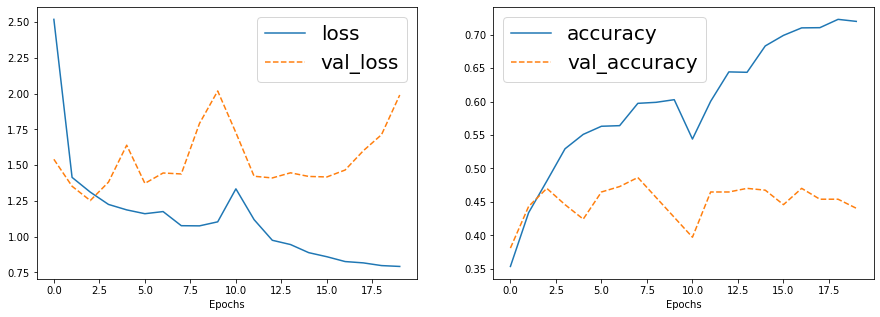

In [ ]:
regularizer = keras.regularizers.l1_l2(l1=0.0, l2=0.0) # penalty 0.001 for L2 regularization term
num_hidden= 256
lrate = 0.0001

model5 = keras.Sequential(layers=[
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    
    Dense(num_hidden, 
          activation=keras.activations.relu , 
          kernel_regularizer=regularizer),

    Dense(len(CLASS_NAMES), 
          kernel_regularizer=regularizer , 
          activation='softmax')
])

model5.compile(optimizer = keras.optimizers.Adam(learning_rate=lrate),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])
history5 = model5.fit(train_dataset, 
                      validation_data=eval_dataset, 
                      epochs=20)

training_plot(['loss', 'accuracy'], history5)

# **Deeper Neural Network (DNN)**

In [ ]:
# parameterize to the values in the previous cell
def train_and_evaluate(batch_size = 32,
                       lrate = 0.0001,
                       l1 = 0,
                       l2 = 0.001,
                       num_hidden = [64, 16]):
  regularizer = tf.keras.regularizers.l1_l2(l1, l2)

  train_dataset = (tf.data.TextLineDataset("train_set.csv").map(decode_csv)).batch(batch_size)

  eval_dataset = (tf.data.TextLineDataset("eval_set.csv").map(decode_csv)).batch(32) 

  # NN with multiple hidden layers
  layers = [tf.keras.layers.Flatten(
      input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
      name='input_pixels')]
  layers = layers + [
      tf.keras.layers.Dense(nodes,
                            kernel_regularizer=regularizer, 
                            activation=tf.keras.activations.relu,
                            name='hidden_dense_{}'.format(hno))
          for hno, nodes in enumerate(num_hidden)
  ]
  layers = layers + [
      tf.keras.layers.Dense(len(CLASS_NAMES), 
                            kernel_regularizer=regularizer,
                            activation='softmax',
                            name='flower_prob')
  ]

  model = tf.keras.Sequential(layers, name='flower_classification')
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(
                    from_logits=False),
                metrics=['accuracy'])
  print(model.summary())
  history = model.fit(train_dataset, validation_data=eval_dataset, epochs=10)
  training_plot(['loss', 'accuracy'], history)
  return model

Model: "flower_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_pixels (Flatten)      (None, 150528)            0         
                                                                 
 hidden_dense_0 (Dense)      (None, 64)                9633856   
                                                                 
 hidden_dense_1 (Dense)      (None, 16)                1040      
                                                                 
 flower_prob (Dense)         (None, 5)                 85        
                                                                 
Total params: 9,634,981
Trainable params: 9,634,981
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
104/104 [==============================] - 462s 4s/step - loss: 1.8164 - accuracy: 0.2997 - val_loss: 1.5830 - val_accuracy: 0.3865
Epoch 2/10
104/104 

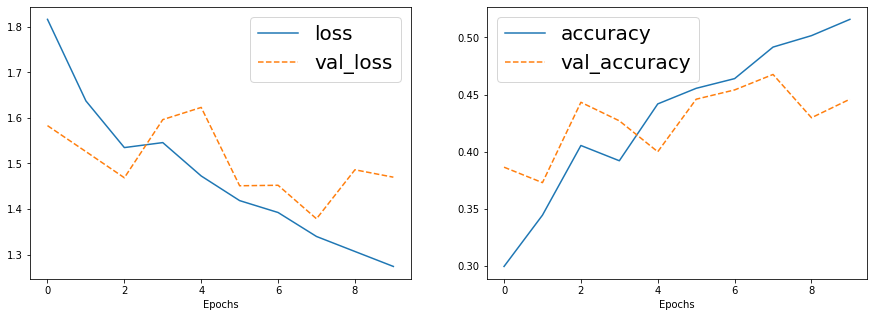

In [ ]:
model6 = train_and_evaluate(lrate=0.0001, l2=0.001, num_hidden = [64, 16])

### DNN with Dropout and Batch Normalization

In [ ]:
# parameterize to the values in the previous cell
def train_and_evaluate(batch_size = 32,
                       lrate = 0.0001,
                       l1 = 0,
                       l2 = 0.001,
                       dropout_prob = 0.4,
                       num_hidden = [64, 16]):
  regularizer = tf.keras.regularizers.l1_l2(l1, l2)

  train_dataset = (tf.data.TextLineDataset("train_set.csv").map(decode_csv)).batch(batch_size)

  eval_dataset = (tf.data.TextLineDataset("eval_set.csv").map(decode_csv)).batch(32) 

  # NN with multiple hidden layers
  layers = [tf.keras.layers.Flatten(
      input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
      name='input_pixels')]
  
  for hno, nodes in enumerate(num_hidden):
    layers.extend([
      tf.keras.layers.Dense(nodes,
                            kernel_regularizer=regularizer, 
                            name='hidden_dense_{}'.format(hno)),
      # Batch Normalization
      tf.keras.layers.BatchNormalization(scale=False, # ReLU
                                         center=False, # have bias in Dense
                                         name='batchnorm_dense_{}'.format(hno)),
      #move activation to come after batchnorm
      tf.keras.layers.Activation('relu', name='relu_dense_{}'.format(hno)),
      # Dropout
      tf.keras.layers.Dropout(rate=dropout_prob,
                             name='dropout_dense_{}'.format(hno)),                         
    ])




  layers = layers + [
      tf.keras.layers.Dense(len(CLASS_NAMES), 
                            kernel_regularizer=regularizer,
                            activation='softmax',
                            name='flower_prob')
  ]

  model = tf.keras.Sequential(layers, name='flower_classification')
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(
                    from_logits=False),
                metrics=['accuracy'])
  print(model.summary())
  history = model.fit(train_dataset, validation_data=eval_dataset, epochs=10)
  training_plot(['loss', 'accuracy'], history)
  return model

Model: "flower_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_pixels (Flatten)      (None, 150528)            0         
                                                                 
 hidden_dense_0 (Dense)      (None, 64)                9633856   
                                                                 
 batchnorm_dense_0 (BatchNor  (None, 64)               128       
 malization)                                                     
                                                                 
 relu_dense_0 (Activation)   (None, 64)                0         
                                                                 
 dropout_dense_0 (Dropout)   (None, 64)                0         
                                                                 
 hidden_dense_1 (Dense)      (None, 16)                1040      
                                             

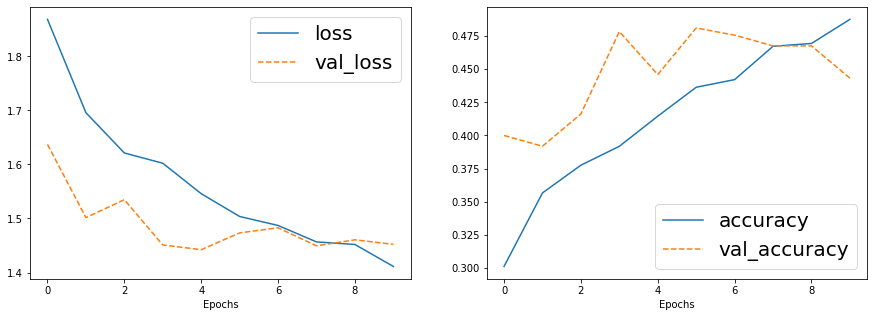

In [ ]:
model7 = train_and_evaluate(lrate=0.0001, l2=0.001, num_hidden = [64, 16])

# **Conclusion** 
Traditional fully connected neural networks that treat pixels as independent inputs act poorly on Images

**Why?**

They do not take advantage of the fact that pixels are highly correlated and in conjunction can create shapes such as edges and arcs

**Note:** These edges and arcs together can create recognizable parts of an image. 

# Notice
Copyright 2020 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.